In [536]:
import matplotlib.pyplot as plt
import pandas as pd

In [537]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [538]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7c862377f950>)

In [539]:
medical_df = pd.read_csv('medical.csv')

In [540]:
medical_df.info()
medical_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [541]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [542]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [543]:
fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [544]:
fig = px.histogram(medical_df,
                   x='bmi',
                   title="distribution of BMI",
                   marginal='box',
                   color_discrete_sequence=['green']
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [545]:
fig = px.histogram(medical_df,
                   x='charges',
                   marginal='box',
                   color ='smoker',
                   color_discrete_sequence=['red','grey']
                   )
fig.update_layout(bargap=0.1)
fig.show()

In [546]:
fig = px.scatter(
    medical_df,
    x='age',
    y='charges',
    color='smoker',
    title='age vs charges'
)
fig.show()

In [547]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [548]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [549]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

age>bmi>children

Non integral ones:

In [550]:
smoker_values = {'no' : 0, 'yes' : 1}
smoker_numeric = medical_df.smoker.map(smoker_values)

In [551]:
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [552]:
region_values = {'southwest' : 0, 'southeast' : 1, 'northwest' : 2, 'northeast' : 3}
region_numeric = medical_df.region.map(region_values)

In [553]:
medical_df.charges.corr(region_numeric)

np.float64(0.006208234909444513)

In [554]:
sex_values = {'male' : 0, 'female' : 1}
sex_numeric = medical_df.sex.map(sex_values)
sex_numeric

,sex
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,1
1335,1
1336,1


In [555]:
medical_df.charges.corr(sex_numeric)

np.float64(-0.057292062202025484)

smoker > age > bmi > children > region > sex



In [556]:
numeric_df = medical_df.copy()
numeric_df['smoker'] = smoker_numeric
numeric_df['region'] = region_numeric
numeric_df['sex'] = sex_numeric

correlation_matrix = numeric_df.corr()

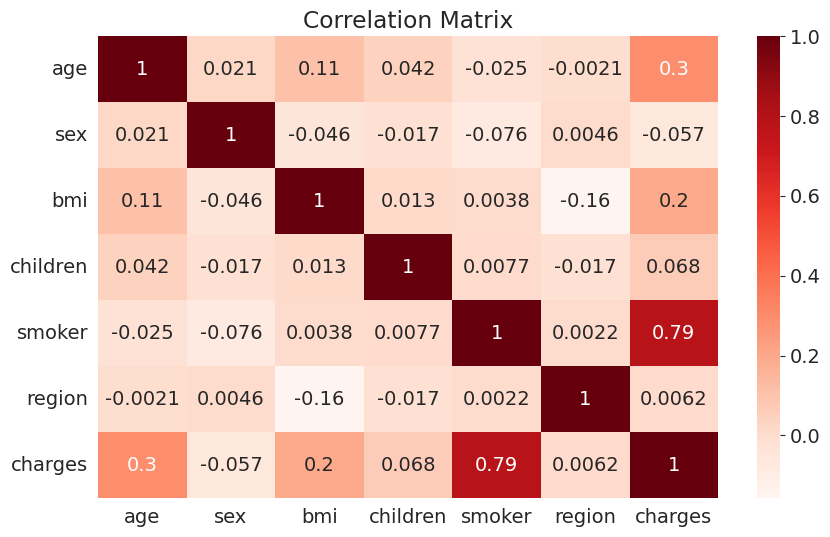

In [557]:
sns.heatmap(numeric_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

In [558]:
non_smoker_df = medical_df[medical_df.smoker == 'no']

<Axes: xlabel='age', ylabel='charges'>

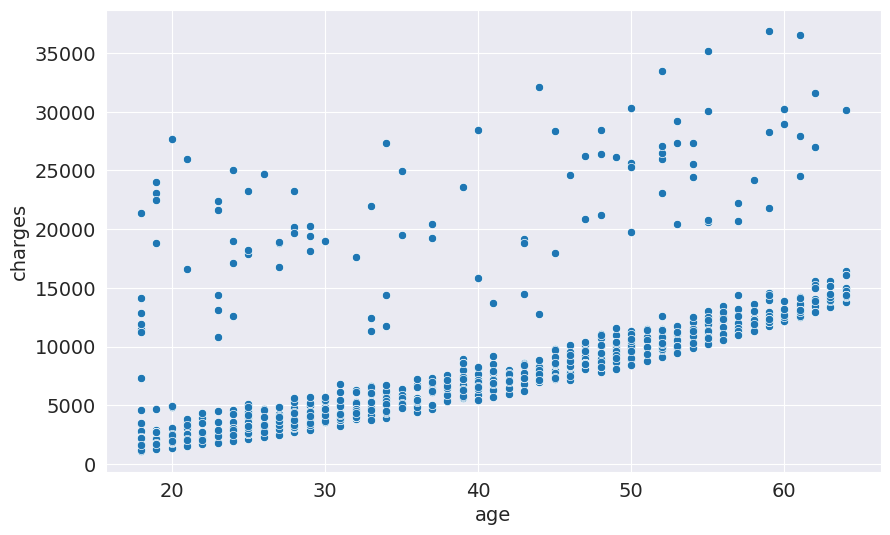

In [559]:
sns.scatterplot(data=non_smoker_df, x='age', y='charges')

In [560]:
def estimate_charges(age, w, b):
  return w*age + b

In [561]:
w= 50
b=100

In [562]:
ages = non_smoker_df.age
estimated_charges = estimate_charges(ages, w, b)

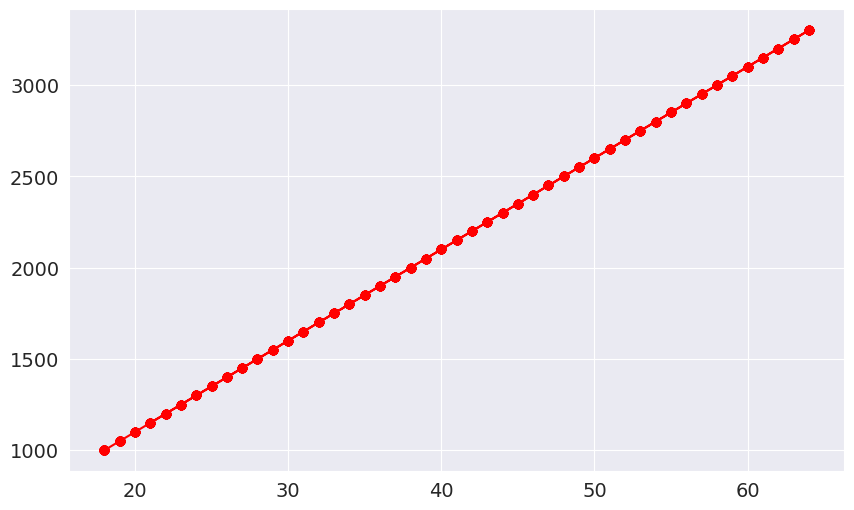

In [563]:
plt.plot(ages, estimated_charges, 'r-o');

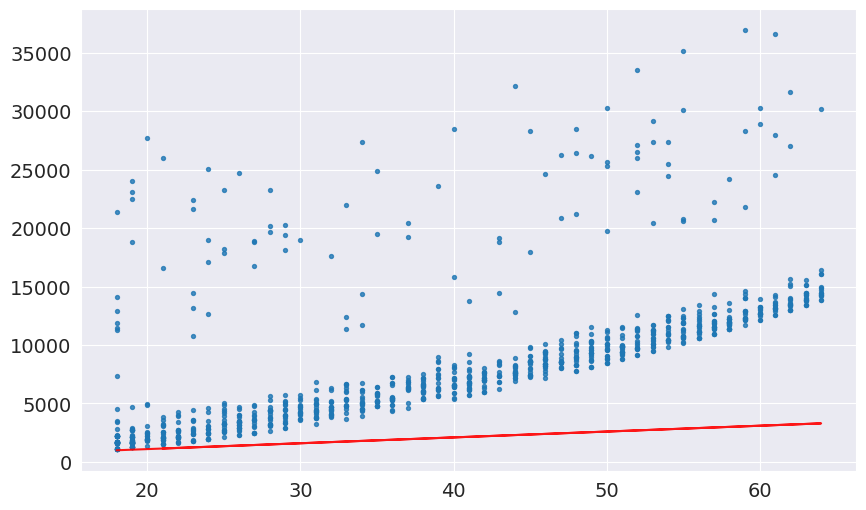

In [564]:
target = non_smoker_df.charges

plt.plot(ages, estimated_charges, 'r', alpha=0.9);
plt.scatter(ages, target, s=8,alpha=0.8);

In [565]:
def try_parameters(w, b):
  ages = non_smoker_df.age
  target = non_smoker_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, 'r', alpha=0.9);
  plt.scatter(ages, target, s=8,alpha=0.8);
  plt.xlabel('Age');
  plt.ylabel('Charges')
  plt.legend(['Estimate', 'Actual']);

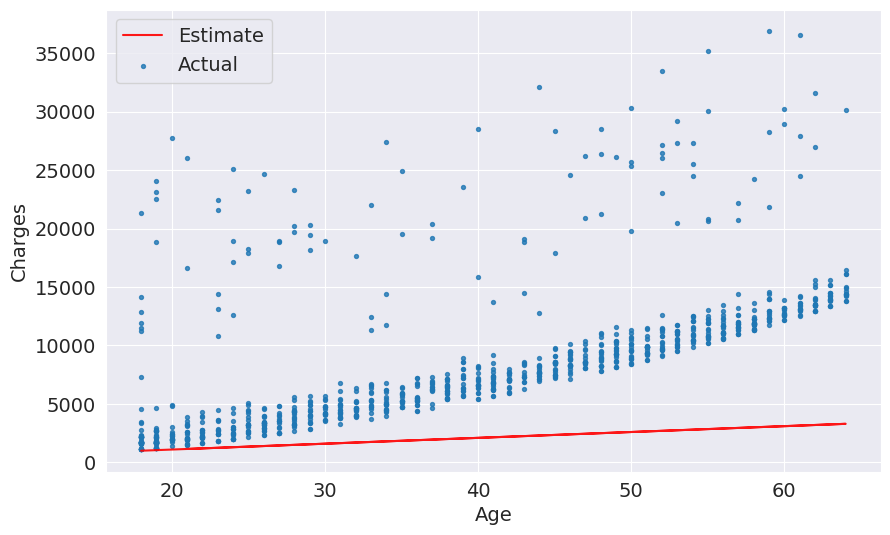

In [566]:
try_parameters(50, 100)

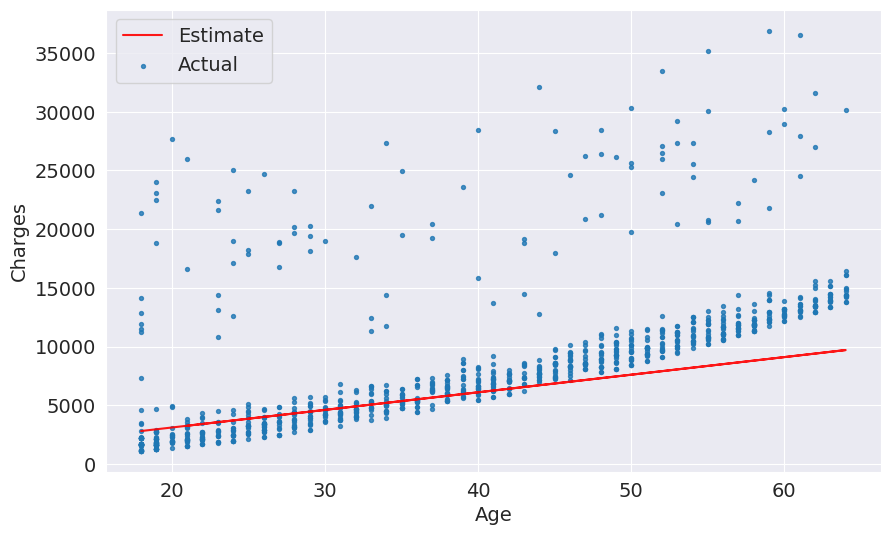

In [567]:
try_parameters(150, 100)

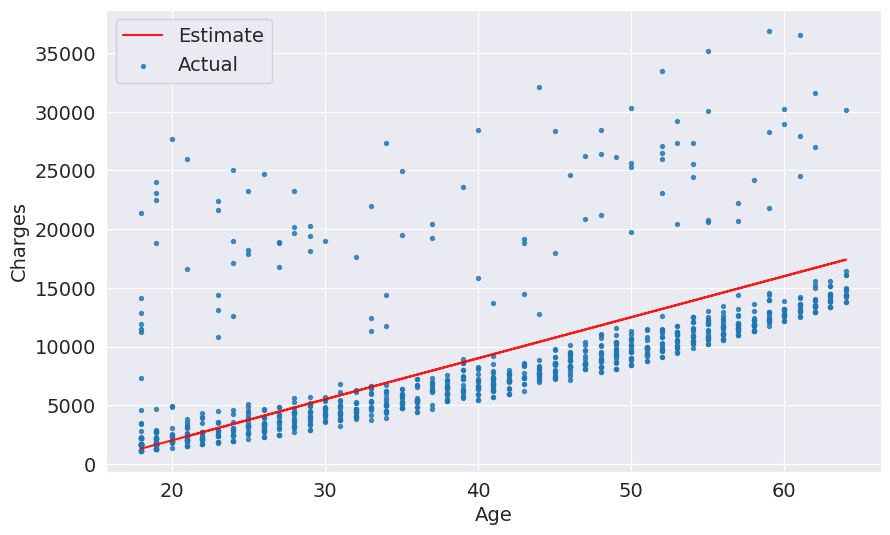

In [568]:
try_parameters(350, -5000)

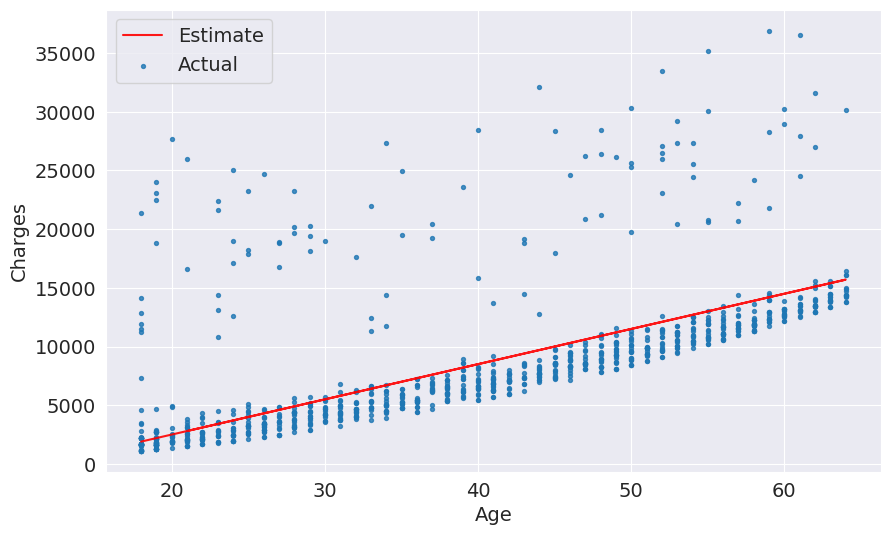

In [569]:
try_parameters(300, -3500)

In [570]:
import numpy as np


def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [571]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predictions = estimate_charges(ages, w, b)

    plt.plot(ages, predictions, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Prediction', 'Actual']);

    loss = rmse(target, predictions)
    print("RMSE Loss: ", loss)

RMSE Loss:  4685.280920735073


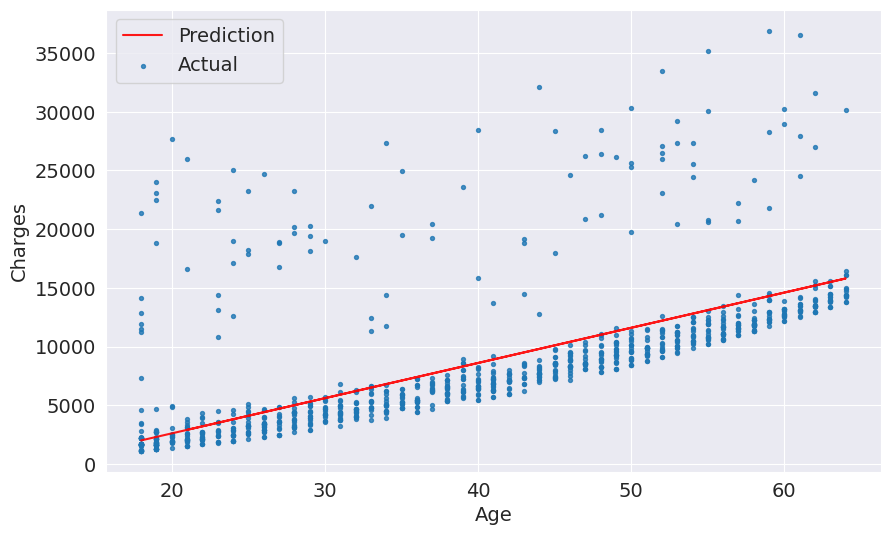

In [572]:
try_parameters(300, -3400)

In [573]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [574]:
inputs = non_smoker_df[['age']]
targets = non_smoker_df.charges

In [575]:
model.fit(inputs, targets)

LinearRegression()

In [576]:
model.predict(np.array([[23],
                        [37],
                        [61]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [577]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [578]:
rmse(targets, predictions)

np.float64(4662.505766636395)

In [579]:
model.coef_

array([267.24891283])

In [580]:
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss:  4662.516524487403


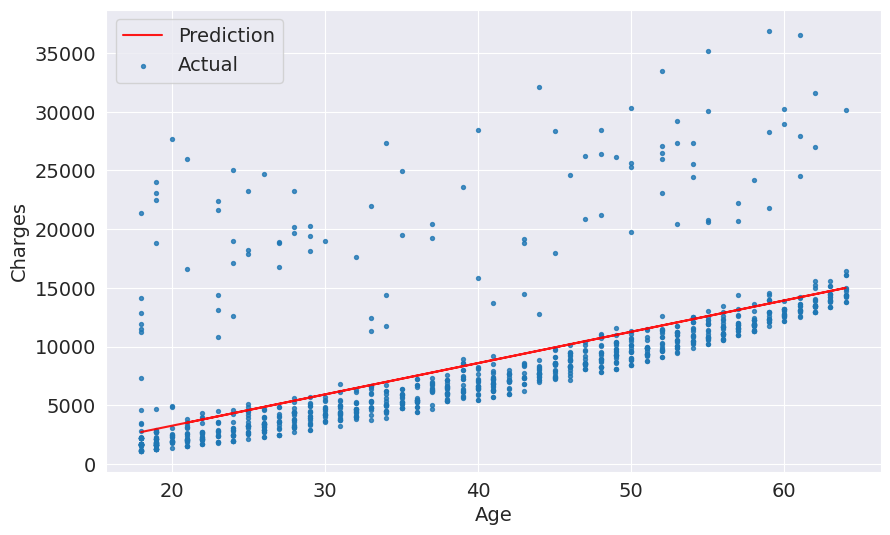

In [581]:
try_parameters(267, -2091)

In [582]:
# Create inputs and targets
inputs, targets = non_smoker_df[['age']], non_smoker_df['charges']

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evalute the model
loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 4662.505766636395


In [583]:
smoker_codes = {'no':0, 'yes':1}
medical_df['smoker'] = medical_df.smoker.map(smoker_codes)

In [584]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [585]:
medical_df.charges.corr(medical_df.smoker)

np.float64(0.787251430498478)

In [586]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: " ,loss)

Loss:  6056.439217188081


In [587]:
sex_codes = {'female': 0, 'male': 1}

In [588]:
medical_df['sex'] = medical_df.sex.map(sex_codes)

In [589]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [590]:
inputs, taegets = medical_df[['age', 'bmi', 'children', 'smoker', 'sex']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: " ,loss)

Loss:  6056.100708754546


In [591]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [592]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [593]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [594]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [595]:
medical_df

,age,sex,bmi,children,smoker,region,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0.0,0.0,0.0,1.0
1,18,1,33.770,1,0,southeast,1725.55230,0.0,0.0,1.0,0.0
2,28,1,33.000,3,0,southeast,4449.46200,0.0,0.0,1.0,0.0
3,33,1,22.705,0,0,northwest,21984.47061,0.0,1.0,0.0,0.0
4,32,1,28.880,0,0,northwest,3866.85520,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830,0.0,1.0,0.0,0.0
1334,18,0,31.920,0,0,northeast,2205.98080,1.0,0.0,0.0,0.0
1335,18,0,36.850,0,0,southeast,1629.83350,0.0,0.0,1.0,0.0
1336,21,0,25.800,0,0,southwest,2007.94500,0.0,0.0,0.0,1.0


In [596]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker', 'sex', 'northeast', 'northwest', 'southeast', 'southwest']], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print("Loss: " ,loss)

Loss:  6041.6796511744515


In [597]:
model.predict([[28, 30, 2, 1, 0, 0, 1, 0, 0]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

THE END!